***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility Space](4_0_introduction.ipynb)
    * Previous: [4.0 Introduction](4_0_introduction.ipynb)
    * Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

# 4.1 Periodic Functions and Fourier Analysis

<span style="background-color:red">TLG:MC: Merge the fundamentals about Fourier series and Fourier transform into chapter two. Keep the physics related to visibilities here, for instance the point source stuff and the Gaussian source stuff. Cut down in size.</span>

<span style="background-color:red">TLG:RC: Reduce your use of subsections. You go way to deep into subsections.</span>

In this section, we will talk briefly about waves, then introduce Fourier analysis. Our aim is to make Fourier analysis as obvious as possible, while still going into sufficient depth to allow students to develop a good physical intuition.

A short note on nomenclature: in the literature, Fourier space can be referred to as *phase space*, *Fourier space*, *$k$-space*, *visibility space*, *uv-space* and more besides depending on the discipline. In this book, these terms will be used interchangeably: they all mean the same thing.

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary? Fourier analysis especially.</span>


### 4.1.1 Periodic Functions

Here, we will provide a very brief reminder of important properties of periodic functions. These should already be covered - and in greater detail - in [$\S$2.2](../2_Mathematical_Groundwork/2_2_important_functions.ipynb). This should therefore not be new material, but things to keep in mind as you read this chapter.

#### 4.1.1.1 Characteristics of a Periodic Function

A periodic function is an endlessly repeating function. The simplest periodic function is the humble *sine* function:

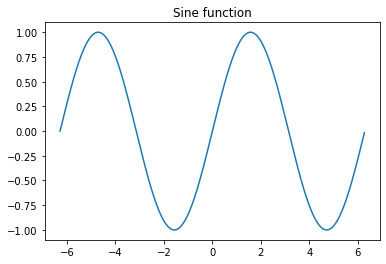

In [3]:
x=(np.arange(800)-400)/200.*np.pi
plt.title("Sine function")
plt.plot(x,np.sin(x))

**Figure 4.1.1**: A simple sine function

Two quantities define a periodic function: *amplitude* and *frequency*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
Amplitude defines the size of the wave; frequency defines how often the wave repeats. In the example above, both are set to 1; the function therefore repeats every $2\pi$ (since the sin function is the y-projection of a particle moving in a circular orbit), and has an amplitude of 1 (since the aforementioned orbit is of unit radius).

Two constants can also be added to a periodic function: *amplitude offset* and *phase offset*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
A more general expression for our basic periodic function would therefore be:

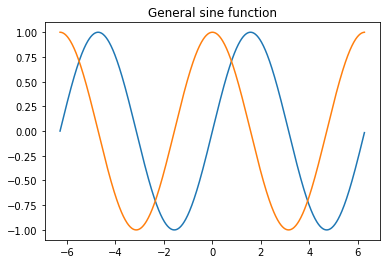

In [4]:
amplitude        = 1
frequency        = 1
phase_offset     = np.pi/2.
amplitude_offset = 0
plt.title("General sine function")
plt.plot(x,np.sin(x))
plt.plot(x,amplitude*np.sin(frequency*x+phase_offset)+amplitude_offset)

**Figure 4.1.2**: Comparison between a basic sine function and what happens when you play with its parameters

I strongly encourage you to play with the graph above - for example, what happens when you set the amplitude to -1 ? What happens if you set the amplitude to -1 and the phase offset to $\pi$? 

<div class=advice>
**N.B.** Note that setting the phase offset of a sine function to $\frac{\pi}{2}$ gives you a *different* periodic function: a cosine function.
</div>

<div class=warn>
In many physics textbooks, the frequency $f$ may be referred to as the *angular frequency* $\omega$. The two are linked by the following relation:

<center>$\omega = 2\pi f$</center>
</div>

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>

#### 4.1.1.2 Complex Periodic Functions

There exist many periodic functions, all built from the humble sine function. One of particular interest to physicists - for it helps us describe electromagnetic waves - is the exponential form of the complex periodic function, as defined by Euler's formula:
<div class=warn>
<center>$e^{ix} = \cos(x) + i \sin(x)$</center>
</div>
For the remainder of this section, we will use both sine and exponential forms of periodic functions.

### 4.1.2 Fourier analysis: Reconstructing Signals

We will now go over relevant properties of Fourier analysis, again to highlight key concepts to keep in mind when you start delving into the rest of this section. All of this content is described in greater detail in [$\S$2.3](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb).

#### 4.1.2.1 Fourier Series

<span style="background-color:red">TLG:MC: Merge into 2.3. Try to add to that section
bringing with it some simplicity. Merge your explanation with what is there.</span>
A key discovery of French mathematician Joseph Fourier was that, within a bounded interval, any integrable function - no matter its shape - could be replicated using a linear combination of sines and cosines. The bounded interval is significant: since we are replicating the original function with periodic functions, the predefined interval will essentially correspond to the maximum period of our sines and cosines.

Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.3. &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb). Here, we will try to give a more physical understanding of the operation.

Consider some arbitrary function (here, $f(x) = (x-0.5)^3+3$):

Text(0.5, 0, 'x')

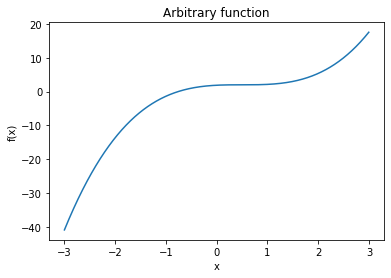

In [5]:
# define range of x-axis
x=(np.arange(1200)-600.)/200
# calculate y as a function of x
y=(x-0.5)**3+2
# plot
plt.plot(x,y)
plt.title("Arbitrary function")
plt.ylabel("f(x)")
plt.xlabel("x")

**Figure 4.1.3**: Plot of our arbitrary function

Let us now consider that we are only interested in this function in the range $x=[-2,2]$. Our interval is thus 4: the period over which we will replicate our initial function $f(x)$ will be 4. Our function here is definitely integrable over the period of interest; we can thus perform a Fourier series and try to replicate our function over our interval of interest. The formula to do so is as follows:

<center>$\displaystyle f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\inf}[a_n\cos(w_n t) + b_n \sin(w_n t)]$</center>

with

<center>$\displaystyle w_n = \frac{2\pi n}{x_1-x_0}$</center>

<center>$\displaystyle a_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \cos(w_n t)dt $</center>

<center>$\displaystyle b_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \sin(w_n t)dt $</center>

Note the factor of 0.5 in front of $a_0$.

In practice, of course, the upper limit of $n\rightarrow\infty$ is not achievable. Let us try to replicate the arbitrary function above using different values of $n_{max}$.

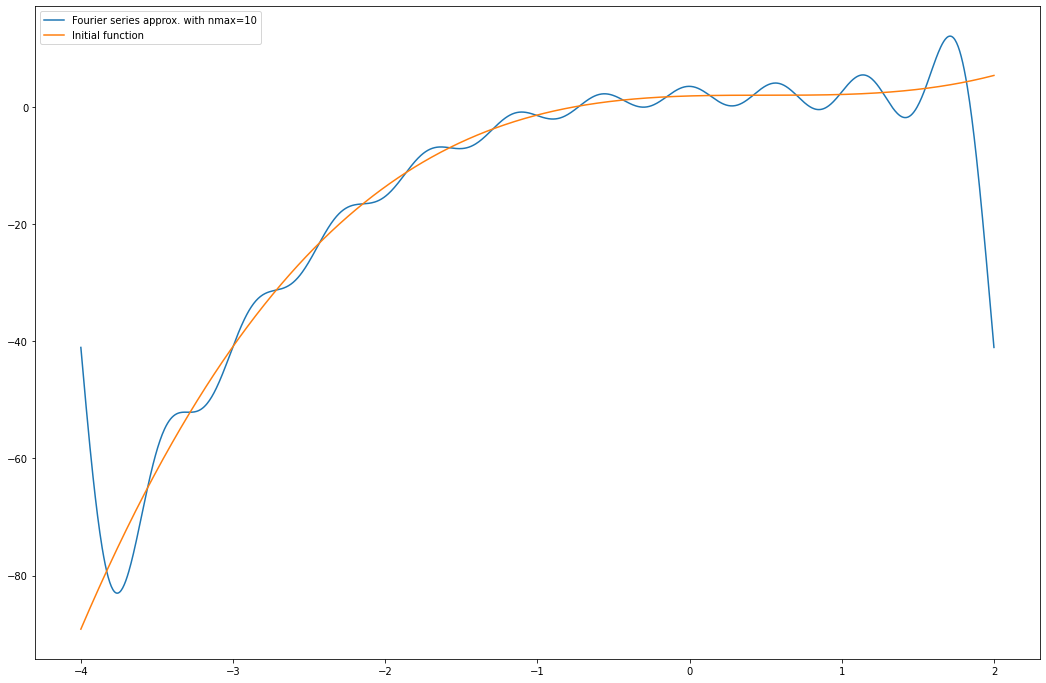

In [6]:
nmax=10
x=(np.arange(1201)-800.)/200
y=(x-0.5)**3+2

def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
    return approx
        
yApprox=FourierSeriesApprox(x,y,nmax)
#plt.plot(x,y)
plt.figure(figsize=(18,12))
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")

**Figure 4.1.4**: Overlay of our arbitrary function and its Fourier series approximation for a given number of Fourier coefficients

Note that our fit becomes worse at the edges if we are fitting a function with a different period than our sampling period. This is because our sines and cosines must repeat at some point - hence the divergence at the edges of our sampling.

<div class=warn>
Each $n$ corresponds to a given *spatial frequency* of our function over the sampling range: there are certain frequencies for which our periodic functions prove better "fits" for our function. This is the **key point** of Fourier analysis: we seek to find what scales contain most of our function's information. As $n_{max}$ increases, we pick up finer and finer detail; as it tends to infinity, we get closer to being able to deal with discontinuities.
</div>

Physicists tend to discuss this in terms of energy. Each characteristic scale has a certain amount of information - a certain amount of "energy" from the function's total energy budget. If the function is constant, for example, we know that the characteristic scale will be in the constant term in the Fourier series (i.e. $a_0$): equivalently, we can say that all the function's power is concentrated in $a_0$. The reason we talk about "power" is explained in [$\S$ 4.1.2.3 &#10549;](#vis:sec:ps).

Note that the Fourier series can also be written in terms of a complex exponential as follows:

<center>
\begin{align}\displaystyle
f(t) &= \sum_{n=-N}^N c_n e^{i w_n x}\\
w_n  &= \frac{2\pi n}{x_1-x_0}\\
c_n  &= \frac{1}{x_1-x_0} \int_{x_0}^{x_1} f(t) \cdot e^{-i w_n x}dx
\end{align}</center>

##### 4.1.2.2 Fourier Transform
<span style="background-color:red">TLG:MC: Very important but merge into 2.4.</span>

In the example above, we have taken a *limited time band* and found weights associated with *discrete spatial frequencies*. However, why should we restrict ourselves to *discrete* spatial frequencies? Indeed, with sufficiently large $n_{max}$, we should approach a *continuous* sampling of our function's Fourier coefficients.

By considering our function over its full range (i.e. $[x_0,x_1]\rightarrow[-\infty,\infty]$) and sampling infinitesimally finely in space, we can thus take the complex exponential form of the Fourier series to define the Fourier transform $\tilde{f}$ of a function $f$ defined in 
Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.4. &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb):

<center> $\displaystyle \tilde{f}(s) = \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s} dt$ </center> 

In other words, we create a *continuous* description <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>, for every frequency, of the relative "weight" of the scale associated with that frequency in our function $f(t)$. For the purposes of this section, that is as far as we will take our analysis; everything that's been said about Fourier series holds for Fourier transforms, which are a more general case of the former.

<div class=advice>
Note that this works for both *time* frequencies and *spatial* frequencies. <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span> This latter quantity is what interests us as astronomers - by taking the (2-dimensional) Fourier transform of a (2-dimensional) image of the sky, we can find where the light of our sources lies. Most importantly, **the reverse is true**: we can recreate an image if we know its Fourier space well enough!
</div>

<span style="background-color:cyan">TLG:ST: Use a note style</span>
<span style="background-color:red">TLG:GC: See the comments about the figures below.</span>


##### 4.1.2.2.1 Boundary Problems
<span style="background-color:red">TLG:MC: Very important but merge into 2.4.</span>

<span style="background-color:cyan">TLG:GN: Are F Transform and Series in Glossary? Italic them too.</span>

One key advantage Fourier transforms hold over Fourier series is that we are no longer beholden to poorly-set boundaries. Consider a simple sine wave of the following form:

<center> $f(x) = sin(4x)$ </center>

If we try to find the Fourier coefficient for this function over a range other than a multiple of its period, then we may run into problems. Observe:

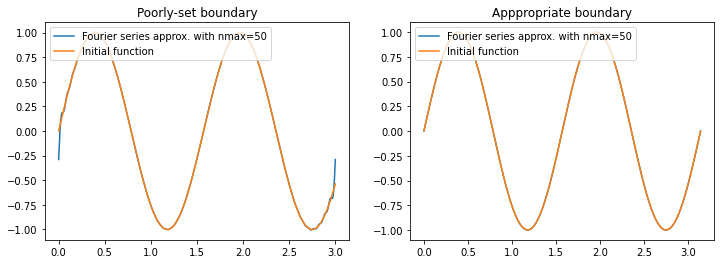

In [7]:
def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
    return approx

nmax=50
x=(np.arange(1201))/400.
y=np.sin(4*x)
yApprox=FourierSeriesApprox(x,y,nmax)

x1=(np.arange(601-300)*np.pi)/300
y1=np.sin(4*x1)
y1Approx=FourierSeriesApprox(x1,y1,nmax)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")
plt.title("Poorly-set boundary")
#plt.show()
plt.subplot(1,2,2)
plt.plot(x1,y1Approx,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x1,y1,label="Initial function")
plt.legend(loc="upper left")
plt.title("Apppropriate boundary")
plt.show()

**Figure 4.1.5**: With an appropriate choice of boundaries, can replicate a function with a single Fourier coefficient - with poor boundary choice, even an infinite amount of Fourier coefficients will not suffice.

The only change between those two functions is the range over which they are plotted (i.e. $x_{min}$ and $x_{max}$). In the first case, we go from 0 to 3, and in the second case from 0 to $\pi$. Although we have only changed our function's boundaries, we get the **exact** result with $n_{max}=2$ in the second case! The point here is the **characteristic Fourier scales of our function are unchanged** - but that **boundary errors** - poorly-set boundaries, in other words - can cause issues when trying to retrieve these scales.

Fourier transforms do not have this problem: they sample over all space, and therefore never sample under the period of any given characteristic scale of our original function. 

##### 4.1.2.2.2 Fourier transform of a sine function

Having recovered our function with $n_{max}=2$, and knowing that the boundaries used to do so were $x=[0,\pi/2]$: how many non-zero Fourier coefficients do we have, and what's their value? What do we get with the right boundaries and $n_{max}=1$, and what does that tell us?

We know that the function is odd, so the integral over the range will be zero: $a_0 = 0$. Similarly, because the function is odd, all $b_n$ will be zero, since our function has no even characteristic scales. $a_1$ will be zero, because the function averages to zero over the periods this function investigates. $a_2$, however, will pick up the exact function: it has the correct $w_n$!

Putting a larger $n_{max}$ will change the poorly-bound Fourier series, but not the appropriately-bound one; you can try this for yourself. This means that, in the appropriately-bound case, all $a_{n \ne 2} = 0$ ! Knowing that Fourier transforms never suffer from boundary problems: what is the 1-D Fourier transform of this function? What would it be for $f(x) = \cos(2x) $ ?

<div class=warn>
As it happens, a sine (or cosine) in the image plane is equivalent to a **point** in the uv-plane: the Fourier transform of a sine or cosine is a *Dirac delta* placed at the function's frequency. This is what radio astronomers refer to when they talk about *interference fringes*: they are talking about the image-plane periodic function associated with a uv-plane point.
</div>

##### 4.1.2.2.3 Fourier transform of a Dirac delta

Consider the extreme case of a point source sitting in the middle of an otherwise empty image (i.e. only one white pixel on an otherwise black image). This is typically described by using a Dirac delta - as defined in [$\S$ 2.2 &#10142;](../2_Mathematical_Groundwork/2_2_important_functions.ipynb):

* Infinitely thin

* Infinitely high

* Constant area: $\int_{-\infty}^{+\infty} \delta(x)dx = 1$

In other words, you can think of the Dirac delta as the limit where a Gaussian has $\sigma \rightarrow 0$ and $A\rightarrow\infty$, while keeping the area under the Gaussian a constant.


If we have a 1-dimensional image (i.e. a row of pixels on your computer screen) with a point source (i.e. only one pixel is activated - it thus contains a Dirac delta), what scale is most representative of our image? If we consider its Fourier transform (thus freeing us from questions of boundary), we get the following:

<center> \begin{align}
\displaystyle {f}(t) &= \delta(t)\\
\displaystyle \tilde{f}(s) &= \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s}\\
                           &= \int_{-\infty}^{\infty} \delta(t) e^{-i2\pi t s} dt
\end{align} </center> 

By the definition of the Dirac delta, this immediately gives us:

<center> $\displaystyle \tilde{f}(s) =  e^{-i2\pi \cdot0\cdot s} = 1$ </center> 

The Fourier transform of a point source (i.e. a single-pixel source. In terms of an astronomical image - an image of the sky - this is the definition of an *unresolved* source) is therefore a constant across all Fourier space. What does this mean in terms of *fringes* (each of which corresponds to **one** Fourier component or *spatial frequency*)? Quite simply that **every fringe** picks up the point source; it is **equally present** at **all spatial scales**. What happens if the Dirac delta is shifted? 

Let us consider a point source in a 2-dimensional image. If the source is located at coordinates $(x_0,y_0)$, then the function ${f}(x,y)$ describing the brightness distribution in our image (in our extended example, which single pixel is activated - at $x_0,y_0$) would be:

<center> $\displaystyle {f}(x,y) = \delta(x-x_0)\delta(y-y_0)$ </center> 

And the corresponding Fourier space:

<center> 
\begin{align}
\displaystyle 
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x
\end{align}</center>

Note that here, we define $k_x$ and $k_y$ to be the *spatial frequencies* in our image, in the $x$ and $y$ directions respectively. Again, by plugging $f(x,y)$ into this equation and using the definition of the Dirac delta, we immediately find:

<center>\begin{align}
\displaystyle \tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} \delta(x-x_0)\delta(y-y_0) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\displaystyle \\
                                 &= e^{-i2\pi (k_x\cdot x_0 + k_y\cdot y_0)}
\end{align}</center>

If our source is at the centre of the image ($x_0=y_0=0$), then we recover our first result: the Fourier plane corresponding to our source is constant. If, however, our source is **not** in the centre of the image (in radio interferometric parlance, if it is not at **phase centre** - the reason for this name will be made explicit in later chapters), then our Fourier space consists of the linear combination of two complex waves. In other words, a Dirac delta not located in the centre of the image plane creates **a fringe pattern in the $uv$-plane** (i.e. Fourier space), the periods of which are directly related to its position. In other words, **a fringe pattern in Fourier space corresponds to a point source in the image plane**.

##### 4.1.2.2.4 Fourier transform of a Gaussian

In practice, few sources in the sky are simple point sources. A more "physical" source is a two-dimensional Gaussian:

<big><center> $\displaystyle f(x,y) = a e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}e^{-\frac{(y-\mu_y)^2}{2\sigma_y^2}} = a e^{-\frac{(x-\mu_x)^2+(y-\mu_y)^2}{2(\sigma_x^2+\sigma_y^2)}}$ </center></big>


With different values of $\mu_x,\mu_y,\sigma_x,\sigma_y$, all sorts of "blob-like" sources can be described. More complex sources can be described as a combination of multiple Gaussians. What does the uv-plane of a simple Gaussian source look like? In our case, since $f(x,y) = f(x)f(y)$, we can split the two-dimensional Fourier integral into the product of two one-dimensional Fourier integrals and use the result from Section 2.4.2:

<center> 
\begin{align}
\displaystyle
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\\
                   &= \int_{-\infty}^{\infty} f(x) e^{-i2\pi k_x\cdot x} dk_x \int_{-\infty}^{\infty} f(y) e^{-i2\pi k_y\cdot y} dk_y\\
                   &= a e^{-\imath 2\pi \mu_x k_x}\,\sqrt{2\pi}\sigma_x\,e^{-2\pi^2k_x^2\sigma_x^2} e^{-\imath 2\pi \mu_y k_y}\, \sqrt{2\pi}\sigma_y\,e^{-2\pi^2k_y^2\sigma_y^2}\\
                   &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)}e^{-i 2\pi (\mu_x k_x + \mu_y k_y)}
\end{align}</center>

If our Gaussian is located at phase centre (i.e. if $\mu_x=\mu_y=0$), then  we are left with another Gaussian:

<center>\begin{align}
\tilde{f}(k_x,k_y) &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)} e^0\\
                   &= 2\pi a \sigma_x \sigma_y e^{-(\frac{k_x^2}{2\sigma_{kx}^2}+\frac{k_y^2}{2\sigma_{ky}^2})}\\
\sigma_{kx}        &= \frac{1}{2\pi\sigma_x}\\
\sigma_{ky}        &= \frac{1}{2\pi\sigma_y}
\end{align}</center>

In other words, the width of our uv-plane Gaussian directly tells us the width of the original Gaussian. If our original Gaussian is located somewhere other than phase centre, we now get a Gaussian multiplied with a fringe pattern in $k$-space (i.e. in the uv-plane). The period of these fringes depends only on $(\mu_x,\mu_y)$ and therefore tell us where the Gaussian is located.

### 4.1.3 Relationship between Image and Fourier planes

So far, we have restricted our analyses to images with a single source. Of course, we know that the sky has a lot more than a single source - what then of the Fourier plane of images with more than a single source?

Let us consider an image with $n$ sources of arbitrary shapes, each defined by a functions $f_n(x,y)$. The value of this image at different positions would then be given by:
<center>
\begin{align}\displaystyle
B(x,y) &= \sum_n f_n(x,y)
\end{align}</center>

The corresponding Fourier plane, then, would be the Fourier transform of $B(x,y)$:

<center>
\begin{align}\displaystyle
\tilde{B}(k_x,k_y) &= \text{FT}\big[B(x,y)\big]\\
                   &= \text{FT}\bigg[\sum_n f_n(x,y)\bigg]\\
                   &= \sum_n \text{FT}\bigg[f_n(x,y)\bigg]\\
\end{align}</center>

In other words, the Fourier plane of our image consists of the linear sum of the Fourier components of each individual source. This means that, in practice, "reading" the Fourier plane of a given image is all but impossible! Some mighty wizards can and do practice such high magic, but they are few and far between.

<div class=warn>
<big> Why is this relevant? Because interferometers do not sample the image plane: they **directly sample the Fourier plane**. The remainder of this chapter will be dedicated to outlining how this is done in practice, and the constraints this choice imposes (and avoids!).</big>
</div>

#### Format status:
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : SP: 2017/02/06
* <span style="background-color:red">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: Date
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 2017/02/06

***

* Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)